# 💖 Speed Dating Experiment 💖

## How speed dating works ? 

The appointment is fixed by the organizing structure in a public place: restaurant, coffeshop, pub... The place is privatized for the event, and about ten numbered tables for two are installed

During the evening, you will meet all the men present during a one-on-one meeting that lasts about ten minutes on average

At the end of the allotted time, a bell rings, indicating the end of the tête-à-tête. At this point, the man leaves his place to another single

You will meet every single person present during the evening. Ten minutes may seem short, but this short time already allows you to know if there are affinities or not

## Librairies & Settings

In [40]:
# Standard Imports
import pandas as pd
import numpy as np
# Viz
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import squarify

from math import pi
import warnings

pd.options.display.max_rows = 1000 #handy for showing truncated results
pd.options.display.max_columns = 1000 #handy for showing truncated results
warnings.filterwarnings('ignore')

## Dataset loading

In [41]:
dataset = pd.read_csv("https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data.csv", encoding='ISO-8859-1')
print(f"Observations : {dataset.shape[0]}\n\nFeatures : {dataset.shape[1]}")

Observations : 8378

Features : 195


# 🔍 EDA - Exploratory Data Analysis 🔎

First we are going to clean our dataset, by removing no relevant and unused features for our analysis.

## Are there any missing values?

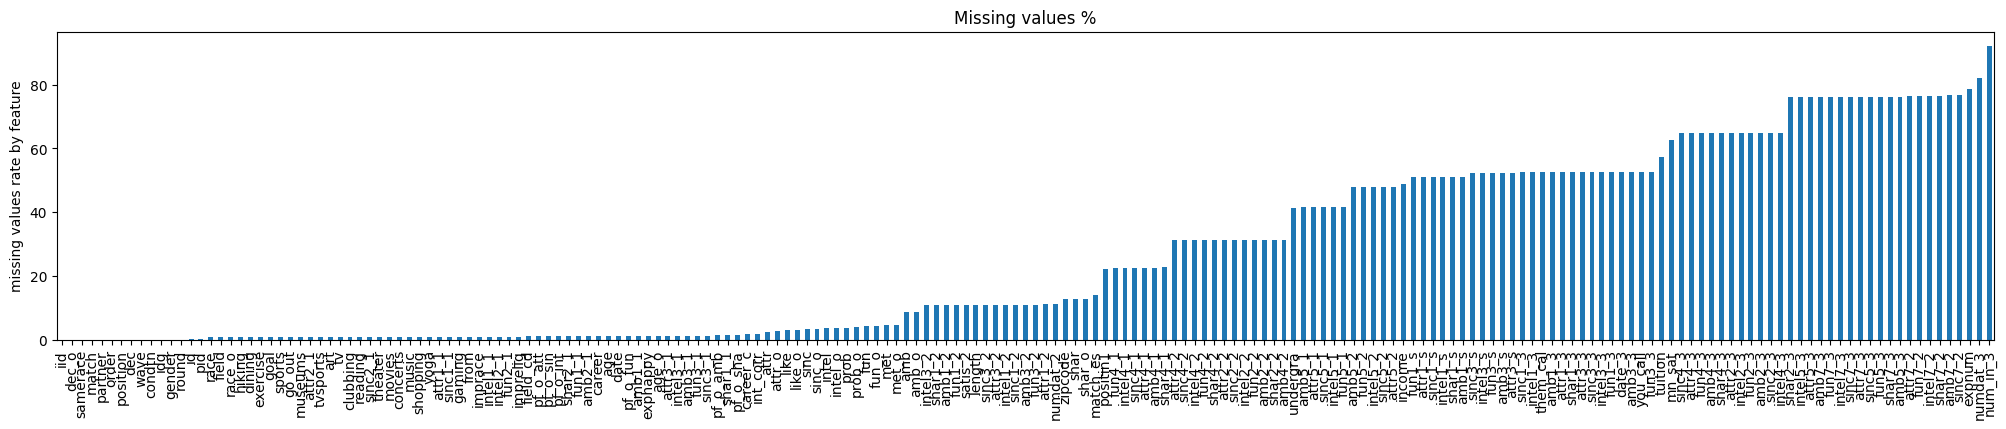

In [42]:
(dataset.isna().mean().sort_values()*100).plot(
    kind="bar", figsize=(25, 4),
    title="Missing values %",
    ylabel="missing values rate by feature")
plt.show()

## For this analysis we will focus only on surveys completed before the event, because the others have to much missing values

see the summary below :

```Python
surveys completed before the event :
['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1' ] #columns on what you look for in the opposite sex
['attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1' ] #columns on what you think MOST of your fellow men/women look for in the opposite sex.
['attr2_1','sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1' ] #columns on what you think the opposite sex looks for in a date
['attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1' ] #columns on how you think you measure up 
['attr5_1','sinc5_1','intel5_1','fun5_1','amb5_1' ] #columns on how you think others perceive you


surveys completed during the event night :
['attr1_s','sinc1_s','intel1_s','fun1_s','amb1_s','shar1_s' ] #columns on what you look for in the opposite sex
['attr3_s','sinc3_s','intel3_s','fun3_s','amb3_s'] #columns on how you think you measure up 

follow-up surveys completed a day after /Time2 :
['attr7_2','sinc7_2','intel7_2','fun7_2','amb7_2','shar7_2' ] #columns on how important your reflections in your decisions
['attr1_2','sinc1_2','intel1_2','fun1_2','amb1_2','shar1_2' ] #columns on what you look for in the opposite sex
['attr4_2','sinc4_2','intel4_2','fun4_2','amb4_2','shar4_2' ] #columns on what you think MOST of your fellow men/women look for in the opposite sex.
['attr2_2','sinc2_2','intel2_2','fun2_2','amb2_2','shar2_2' ] #columns on what you think the opposite sex looks for in a date
['attr3_2','sinc3_2','intel3_2','fun3_2','amb3_2' ] #columns on how you think you measure up 
['attr5_2','sinc5_2','intel5_2','fun5_2','amb5_2'] #columns on how you think others perceive you


follow-up surveys completed 3-4 weeks after /Time3:
['attr7_3','sinc7_3','intel7_3','fun7_3','amb7_3','shar7_3' ] #columns on how important your reflections in your decisions
['attr1_3','sinc1_3','intel1_3','fun1_3','amb1_3','shar1_3' ] #columns on what you look for in the opposite sex
['attr4_3','sinc4_3','intel4_3','fun4_3','amb4_3','shar4_3' ] #columns on what you think MOST of your fellow men/women look for in the opposite sex.
['attr2_3','sinc2_3','intel2_3','fun2_3','amb2_3','shar2_3' ] #columns on what you think the opposite sex looks for in a date
['attr3_3','sinc3_3','intel3_3','fun3_3','amb3_3'] #columns on how you think you measure up 
['attr5_3','sinc5_3','intel5_3','fun5_3','amb5_3' ] #columns on how you think others perceive you
```

For the following, we keep only the 1-5 and 10-21 waves that use the same scale when scoring by participants.

- Waves 1-5 and 10-21 use a scale from 1 to 100.

- Waves of 6-9 use a scale of 1 to 10.

On scale of 1 to 10, we have to score more sharply than a scale of 1 to 100, which psychologically puts us in a different frame of mind and requires us to reason in a different way.

In [43]:
kept_waves = (dataset['wave'] <= 5) | (dataset['wave'] >= 10)
dataset = dataset[kept_waves]
print(f"Observations : {dataset.shape[0]}\n\nFeatures : {dataset.shape[1]}")

Observations : 6816

Features : 195


We delete all features regarting to the survey that had to be filled out 3-4 weeks after the event because there are too many missing values

In [44]:
col_half_way = [col for col in dataset.columns if "_s" in col[-2:]]
col_half_way
dataset.drop(col_half_way, axis=1, inplace=True)
print(f"Observations : {dataset.shape[0]}\n\nFeatures : {dataset.shape[1]}")

Observations : 6816

Features : 184


Then we delete the data from the mid-term survey, which does not seem to me to be relevant in the study because it is too dependent on the series of people that the candidate met during the wave.

If the participant has had a series of bad encounters, then his or her viewpoint will be biased.

In [45]:
col_f2_t3 = [col for col in dataset.columns if "_3" in col]
col_f2_t3
dataset.drop(col_f2_t3, axis=1, inplace=True)
print(f"Observations : {dataset.shape[0]}\n\nFeatures : {dataset.shape[1]}")

Observations : 6816

Features : 147


Then we delete all features with more than 60% missing values. The datas entered are subjectives and replacing missing values with an estimated values may bias the study.

In [46]:
useless_cols = [col for col in dataset.columns if (dataset[col].isna().sum() / len(dataset) * 100) > 70]
dataset.drop(useless_cols, axis=1, inplace=True)
print(f"Observations : {dataset.shape[0]}\n\nFeatures : {dataset.shape[1]}")

Observations : 6816

Features : 140


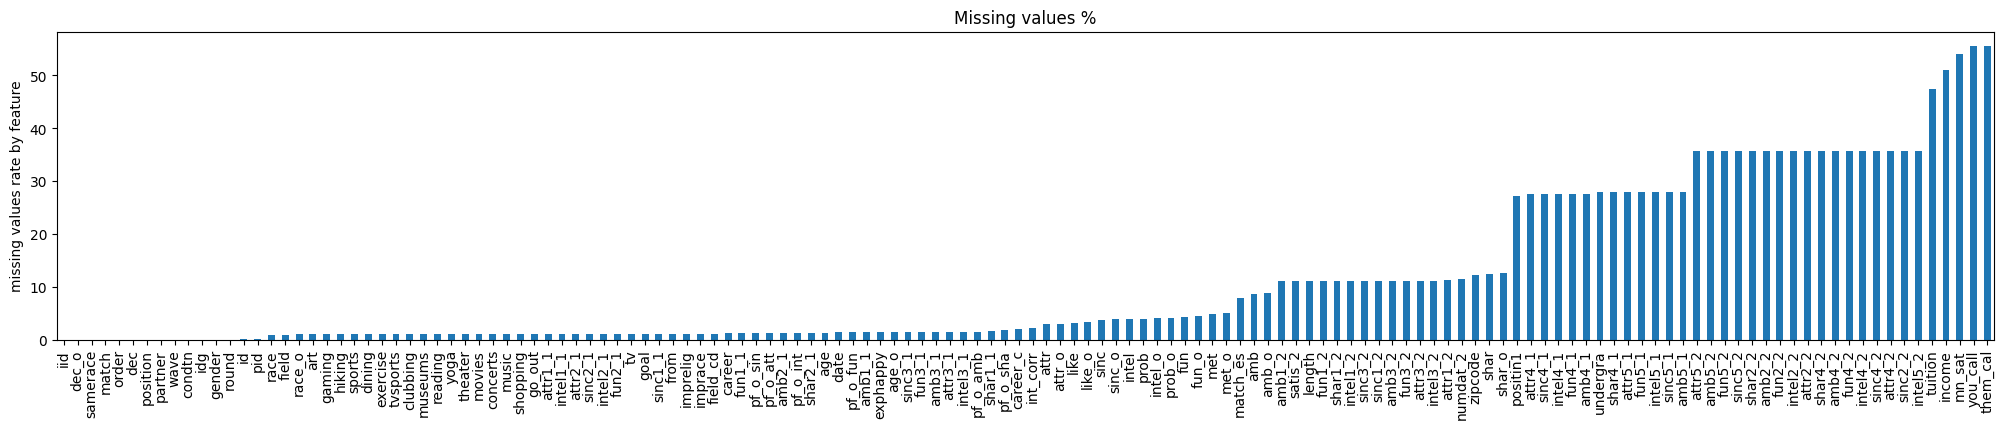

In [47]:
(dataset.isna().mean().sort_values()*100).plot(
    kind="bar", figsize=(25, 4),
    title="Missing values %",
    ylabel="missing values rate by feature")
plt.show()

# Data Cleaning

In [48]:
def rename_columns(df):
    for col in df.columns:
        if "attr" in col.lower():
            df.columns = df.columns.str.replace("attr", "Attractive")
        if "sinc" in col.lower():
            df.columns = df.columns.str.replace("sinc", "Sincere")
        if "intel" in col.lower():
            df.columns = df.columns.str.replace("intel", "Intelligent")
        if "fun" in col.lower():
            df.columns = df.columns.str.replace("fun", "Fun")
        if "amb" in col.lower():
            df.columns = df.columns.str.replace("amb", "Ambitious")
        if "shar" in col.lower():
            df.columns = df.columns.str.replace("shar", "Shared_interests")
    return df.columns

In [49]:
def categorize_prob(score:float):
    if score < 1.0:
        return "no chance"
    elif score >= 1.0 and score < 4.0:
        return "low chance"
    elif score >= 4.0 and score < 7.0:
        return "moderate chance"
    elif score >= 7.0 and score < 10.0:
        return "great chance"
    if score == 10.0:
        return "I'm 100 percent sure"

In [50]:
def categorize_shar_int(score:float):
    if score < 1.0:
        return "none"
    elif score >= 1.0 and score < 4.0:
        return "a little"
    elif score >= 4.0 and score < 7.0:
        return "balanced"
    elif score >= 7.0 and score < 10.0:
        return "many"
    if score == 10.0:
        return "everything"

We remove all missing values inside prob and prob_o features because we will need complete data later

```Markdown
['prob'] = How probable do you think it is that this person will say 'yes' for you ?
['prob_o'] = How the partner think that you will probably say 'yes' for him / her ?
```

In [51]:
dataset['prob'].dropna(inplace=True)
dataset['prob_o'].dropna(inplace=True)
dataset['shar'].dropna(inplace=True)
dataset['prob'] = dataset['prob'].apply(categorize_prob)
dataset['prob_o'] = dataset['prob_o'].apply(categorize_prob)
dataset['shar'] = dataset['shar'].apply(categorize_shar_int)

In [52]:
mask_matches = dataset["match"] == 1
matches = dataset[mask_matches]
nomatches = dataset[~mask_matches]

Let's rename our attributs features for more hunderstanding

In [53]:
dataset.columns = rename_columns(dataset)
matches.columns = rename_columns(matches)
nomatches.columns = rename_columns(nomatches)

Let's split our females and males observations for a better analysis

In [54]:
# Masks
female_mask = dataset["gender"] == 0
male_mask = dataset["gender"] == 1
matched_female_mask = matches["gender"] == 0
matched_male_mask = matches["gender"] == 1
nomatched_female_mask = nomatches["gender"] == 0
nomatched_male_mask = nomatches["gender"] == 1

females = dataset[female_mask]
males = dataset[male_mask]
females_matches = matches[matched_female_mask]
males_matches = matches[matched_male_mask]
females_nomatches = nomatches[nomatched_female_mask]
males_nomatches = nomatches[nomatched_male_mask]

## What Are Participants Looking For in Their Matches ?

First, we’d like to see what do the participants in these speed dating events look for in the opposite sex, and if there exist a difference for male and female participants. At this point in time, the participants have just signed up for the event and have not met anyone.

In [55]:
participants_looking_for = [col for col in dataset.columns if "1_1" in col]
opposite_sex_looks_for = [col for col in dataset.columns if "2_1" in col]

We remove observations with missing values

In [56]:
# Females are looking for
females_looking_for = females[participants_looking_for].dropna()
matched_females_looking_for = females_matches[participants_looking_for].dropna()
nomatched_females_looking_for = females_nomatches[participants_looking_for].dropna()

# Males are looking for
males_looking_for = males[participants_looking_for].dropna()
matched_males_looking_for = males_matches[participants_looking_for].dropna()
nomatched_males_looking_for = males_nomatches[participants_looking_for].dropna()

Average representation of what participants looking for in the opposite sex

In [57]:
df_looking_for = pd.DataFrame({"males": males_looking_for.mean(), "females": females_looking_for.mean()}).T
df_matched_looking_for = pd.DataFrame({"males": matched_males_looking_for.mean(), "females": matched_females_looking_for.mean()}).T
df_nomatched_looking_for = pd.DataFrame({"males": nomatched_males_looking_for.mean(), "females": nomatched_females_looking_for.mean()}).T
display(df_looking_for)
display(df_matched_looking_for)
display(df_nomatched_looking_for)

,Attractive1_1,Sincere1_1,Intelligent1_1,Fun1_1,Ambitious1_1,Shared_interests1_1
males,28.925728,16.240439,19.591681,17.650809,7.498773,10.258607
females,18.648623,18.432483,21.512705,17.090132,12.018897,12.264193


,Attractive1_1,Sincere1_1,Intelligent1_1,Fun1_1,Ambitious1_1,Shared_interests1_1
males,30.111957,14.926431,19.756467,18.185960,7.275580,9.649348
females,18.522098,18.463725,21.853816,17.937505,11.879638,11.433490


,Attractive1_1,Sincere1_1,Intelligent1_1,Fun1_1,Ambitious1_1,Shared_interests1_1
males,28.693612,16.497558,19.559436,17.546094,7.542446,10.377823
females,18.673846,18.426255,21.444704,16.921208,12.046658,12.429795


Average representation of what participants think that the opposite sex is looking for

In [58]:
# Women think that men looking for
females_thinks_males_sex_looking_for = females[opposite_sex_looks_for].dropna()
matched_females_thinks_males_sex_looking_for = females_matches[opposite_sex_looks_for].dropna()
nomatched_females_thinks_males_sex_looking_for = females_nomatches[opposite_sex_looks_for].dropna()

# Men think that Woomen looking for
males_thinks_females_sex_looking_for = males[opposite_sex_looks_for].dropna()
matched_males_thinks_females_sex_looking_for = males_matches[opposite_sex_looks_for].dropna()
nomatched_males_thinks_females_sex_looking_for = males_nomatches[opposite_sex_looks_for].dropna()

d = {"males": males_thinks_females_sex_looking_for.mean(), "females": females_thinks_males_sex_looking_for.mean()}
d_matches = {"males": matched_males_thinks_females_sex_looking_for.mean(), "females": matched_females_thinks_males_sex_looking_for.mean()}
d_nomatches = {"males": nomatched_males_thinks_females_sex_looking_for.mean(), "females": nomatched_females_thinks_males_sex_looking_for.mean()}
df_opposite_sex_looks_for_looking_for = pd.DataFrame(d).T
df_matched_opposite_sex_looks_for_looking_for = pd.DataFrame(d_matches).T
df_nomatched_opposite_sex_looks_for_looking_for = pd.DataFrame(d_nomatches).T
display(df_opposite_sex_looks_for_looking_for)
display(df_matched_opposite_sex_looks_for_looking_for)
display(df_nomatched_opposite_sex_looks_for_looking_for)

,Attractive2_1,Sincere2_1,Intelligent2_1,Fun2_1,Ambitious2_1,Shared_interests2_1
males,26.944132,14.731304,16.166716,18.135087,13.718002,10.198345
females,38.862048,10.416841,12.008659,18.591520,8.303673,12.037623


,Attractive2_1,Sincere2_1,Intelligent2_1,Fun2_1,Ambitious2_1,Shared_interests2_1
males,28.250450,14.452252,16.398198,17.342342,13.920721,9.695495
females,39.164557,10.139241,12.466546,19.115732,7.958409,11.383363


,Attractive2_1,Sincere2_1,Intelligent2_1,Fun2_1,Ambitious2_1,Shared_interests2_1
males,26.687765,14.786068,16.121287,18.290665,13.678218,10.297030
females,38.802217,10.471745,11.918097,18.487840,8.371960,12.167024


Radar Graph of our distribution

In [59]:
def generate_spider_chart(data, categories, title=" ", count=None, color="black", ticks=[]):
    """
    data: Pandas DataFrame
    categories: features you want to display
    """
    # Set data
    df = data
    # ------- PART 1: Create background

    # number of variable
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(1, 2, count, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(ticks, map(str, ticks), color="grey", size=7)
    plt.ylim(0, df.max().max()+5)

    # ------- PART 2: Add plots

    # Plot each individual = each line of the data

    # Ind1
    values = df.loc[df.index[0]].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=df.index[0])
    ax.fill(angles, values, 'b', alpha=0.1)

    # Ind2
    values = df.loc[df.index[1]].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=df.index[1])
    ax.fill(angles, values, 'r', alpha=0.1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    return ax


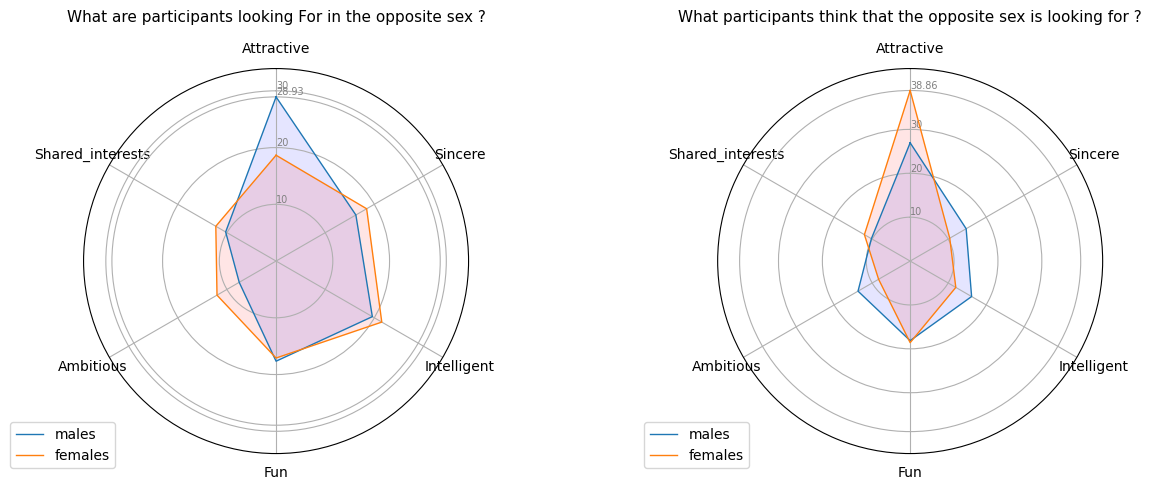

In [60]:
attributs = [col[:-3] for col in df_looking_for.columns]
spider_title_1 = "What are participants looking For in the opposite sex ?"
spider_title_2 = "What participants think that the opposite sex is looking for ?"
max_value_ax1 = df_looking_for.max().max().round(2)
max_value_ax2 = df_opposite_sex_looks_for_looking_for.max().max().round(2)

fig = plt.figure(figsize=(15, 5))

ax1 = generate_spider_chart(df_looking_for, attributs, count=1,
                            title=spider_title_1, ticks=[10, 20, 30, max_value_ax1])
ax2 = generate_spider_chart(df_opposite_sex_looks_for_looking_for,
                            attributs, count=2, title=spider_title_2, ticks=[10, 20, 30, max_value_ax2])


# Why people participates to this SpeedDating experimentation ?

In [61]:
FUN = "Seemed like a fun night out"

MEET_PEOPLE = "To meet new people"

DATE = "To get a date"

SERIOUS = "Looking for a serious relationship"

TRY ="To say I did it"

OTHER = "Other"

## Men ?

In [62]:
males.dropna(subset=["goal"], inplace=True)
males_goal = males["goal"].value_counts().sort_index()
df_males_goal = pd.DataFrame(data=np.array(males_goal).reshape(
    1, 6), columns=[FUN, MEET_PEOPLE, DATE, SERIOUS, TRY, OTHER], index=["number of males"])

display(df_males_goal)

,Seemed like a fun night out,To meet new people,To get a date,Looking for a serious relationship,To say I did it,Other
number of males,1372,1085,398,140,188,210


## Women ?

In [63]:
females.dropna(subset=["goal"], inplace=True)
females_goal = females["goal"].value_counts().sort_index()
df_females_goal = pd.DataFrame(data=np.array(females_goal).reshape(
    1, 6), columns=[FUN, MEET_PEOPLE, DATE, SERIOUS, TRY, OTHER], index=["number of females"])
display(df_females_goal)


,Seemed like a fun night out,To meet new people,To get a date,Looking for a serious relationship,To say I did it,Other
number of females,1367,1407,121,67,244,143


In [64]:
df_goals = pd.concat([df_females_goal,df_males_goal], ignore_index=True)
df_goals.rename(index={0: "number of males", 1: "number of females"}, inplace=True)
df_goals

,Seemed like a fun night out,To meet new people,To get a date,Looking for a serious relationship,To say I did it,Other
number of males,1367,1407,121,67,244,143
number of females,1372,1085,398,140,188,210


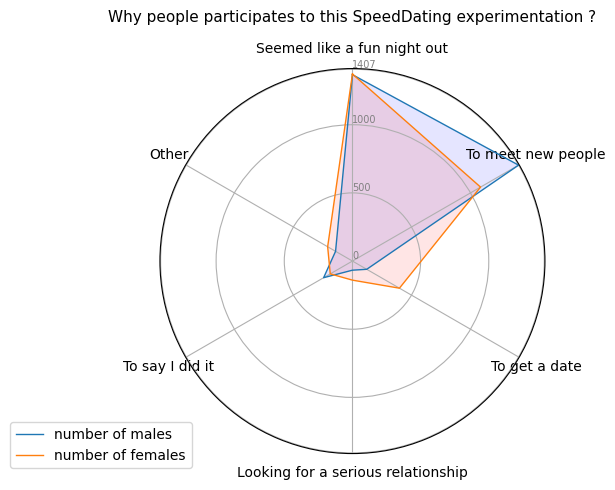

In [65]:
goals = [FUN, MEET_PEOPLE, DATE, SERIOUS, TRY, OTHER]
goals_chart_title = "Why people participates to this SpeedDating experimentation ?"
max_value = df_goals.max().max()
fig = plt.figure(figsize=(15, 5))
ax3 = generate_spider_chart(df_goals, goals, count=1,
                            title=goals_chart_title, ticks=[0,500,1000,1500, max_value])

First motivation of participants seems to be having a fun night with no suspicious back ideas in mind, or to meet new people.
In fact, getting a date or serious relationship is not the main motivation, especially for men.

# Are shared interests more important than a shared racial background?

In [66]:
nomatches_same_race = len(nomatches[nomatches["samerace"] == 1])
nomatches_not_same_race = len(nomatches[nomatches["samerace"] == 0])
matches_same_race = len(matches[matches["samerace"] == 1])
matches_not_same_race = len(matches[matches["samerace"] == 0])


In [67]:
def rename_race(x:str):
    match x:
        case 1.0:
            return "Black/African American"
        case 2.0:
            return "European/Caucasian-American"
        case 3.0:
            return "Latino/Hispanic American"
        case 4.0:
            return "Asian/Pacific Islander/Asian-American"
        case 5.0:
            return "Native American"
        case 6.0:
            return "Other"

In [68]:
dataset["race"] = dataset["race"].apply(rename_race)
dataset["race"].value_counts()

European/Caucasian-American              3786
Asian/Pacific Islander/Asian-American    1649
Latino/Hispanic American                  569
Other                                     446
Black/African American                    308
Name: race, dtype: int64

Text(0.5, 1.0, 'Distribution of races among the dataset')

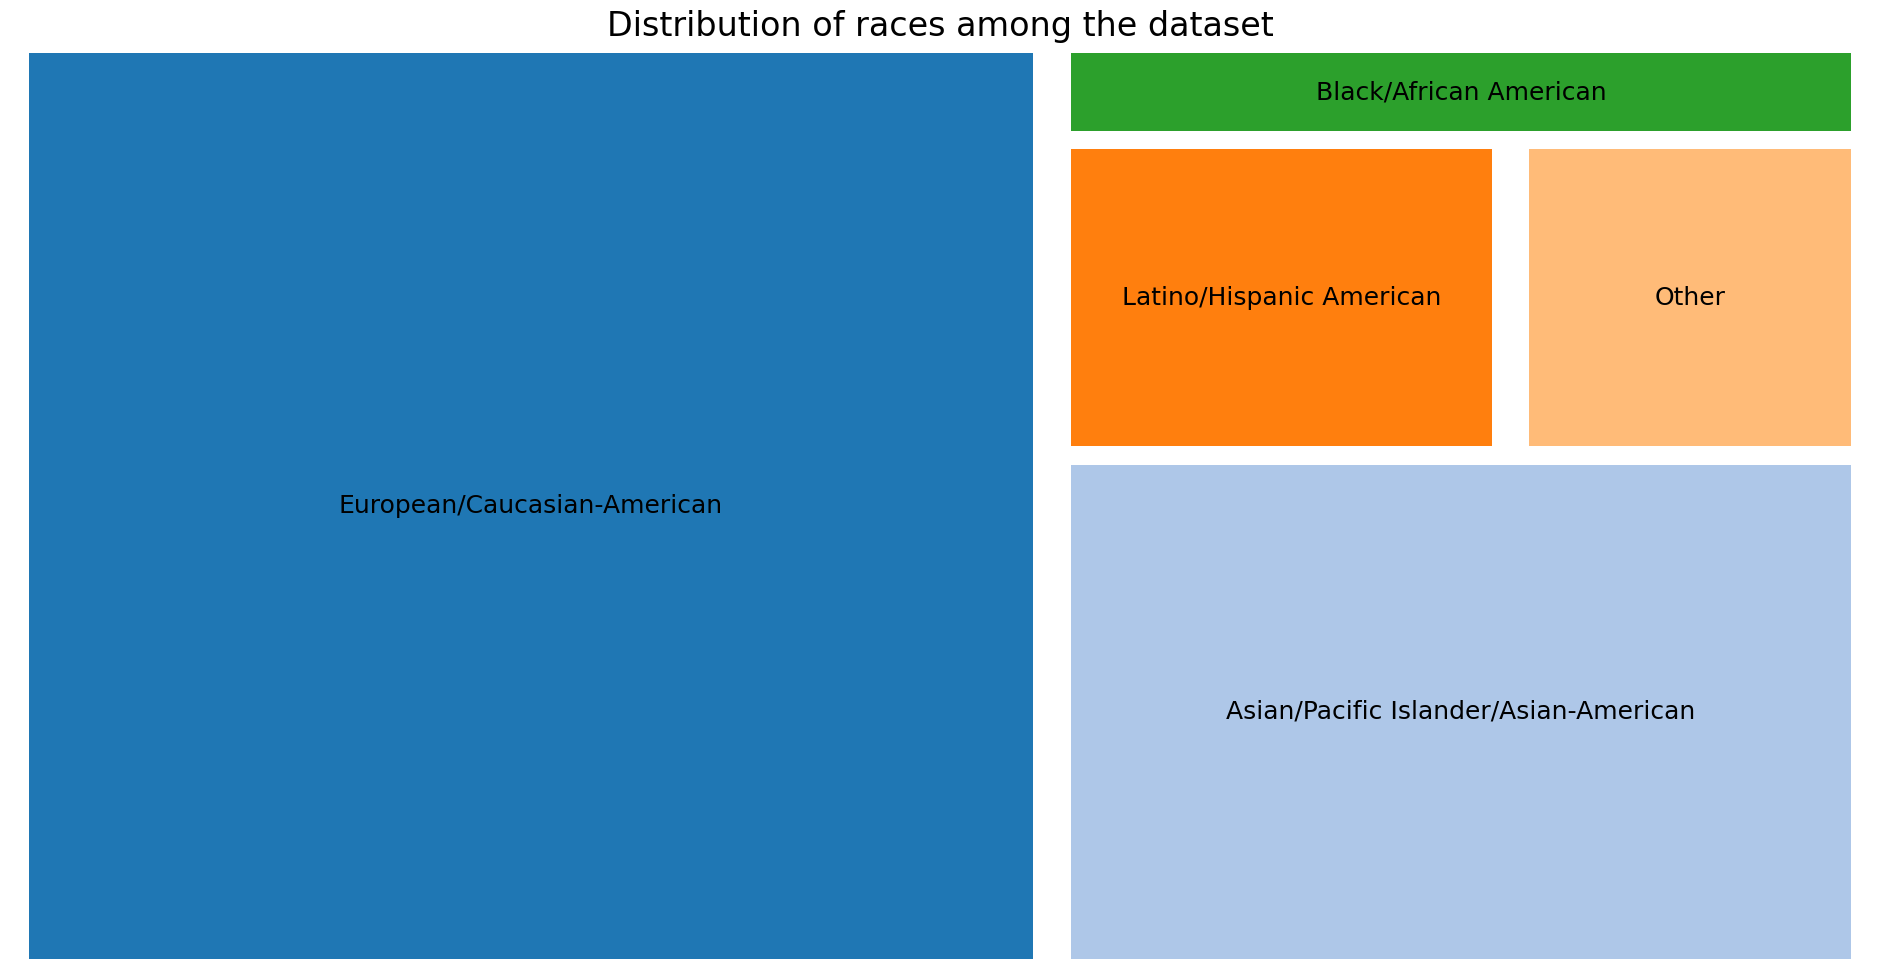

In [69]:
# create a plot figure with figsize
plt.figure(figsize=(24, 12))
# we don't require the axis values so lets remove it
plt.axis("off")
axis = squarify.plot(dataset["race"].value_counts(),
                     label=dataset["race"].value_counts().index,
                     color=sb.color_palette("tab20", len(
                                            dataset["race"].value_counts())),
                     pad=1,
                     text_kwargs={'fontsize': 18})
axis.set_title("Distribution of races among the dataset", fontsize=24)


In [70]:
matches["race"] = matches["race"].apply(rename_race)
matches["race"].value_counts()

European/Caucasian-American              643
Asian/Pacific Islander/Asian-American    218
Latino/Hispanic American                 105
Other                                     91
Black/African American                    54
Name: race, dtype: int64

Text(0.5, 1.0, 'Distribution of races among the matched people')

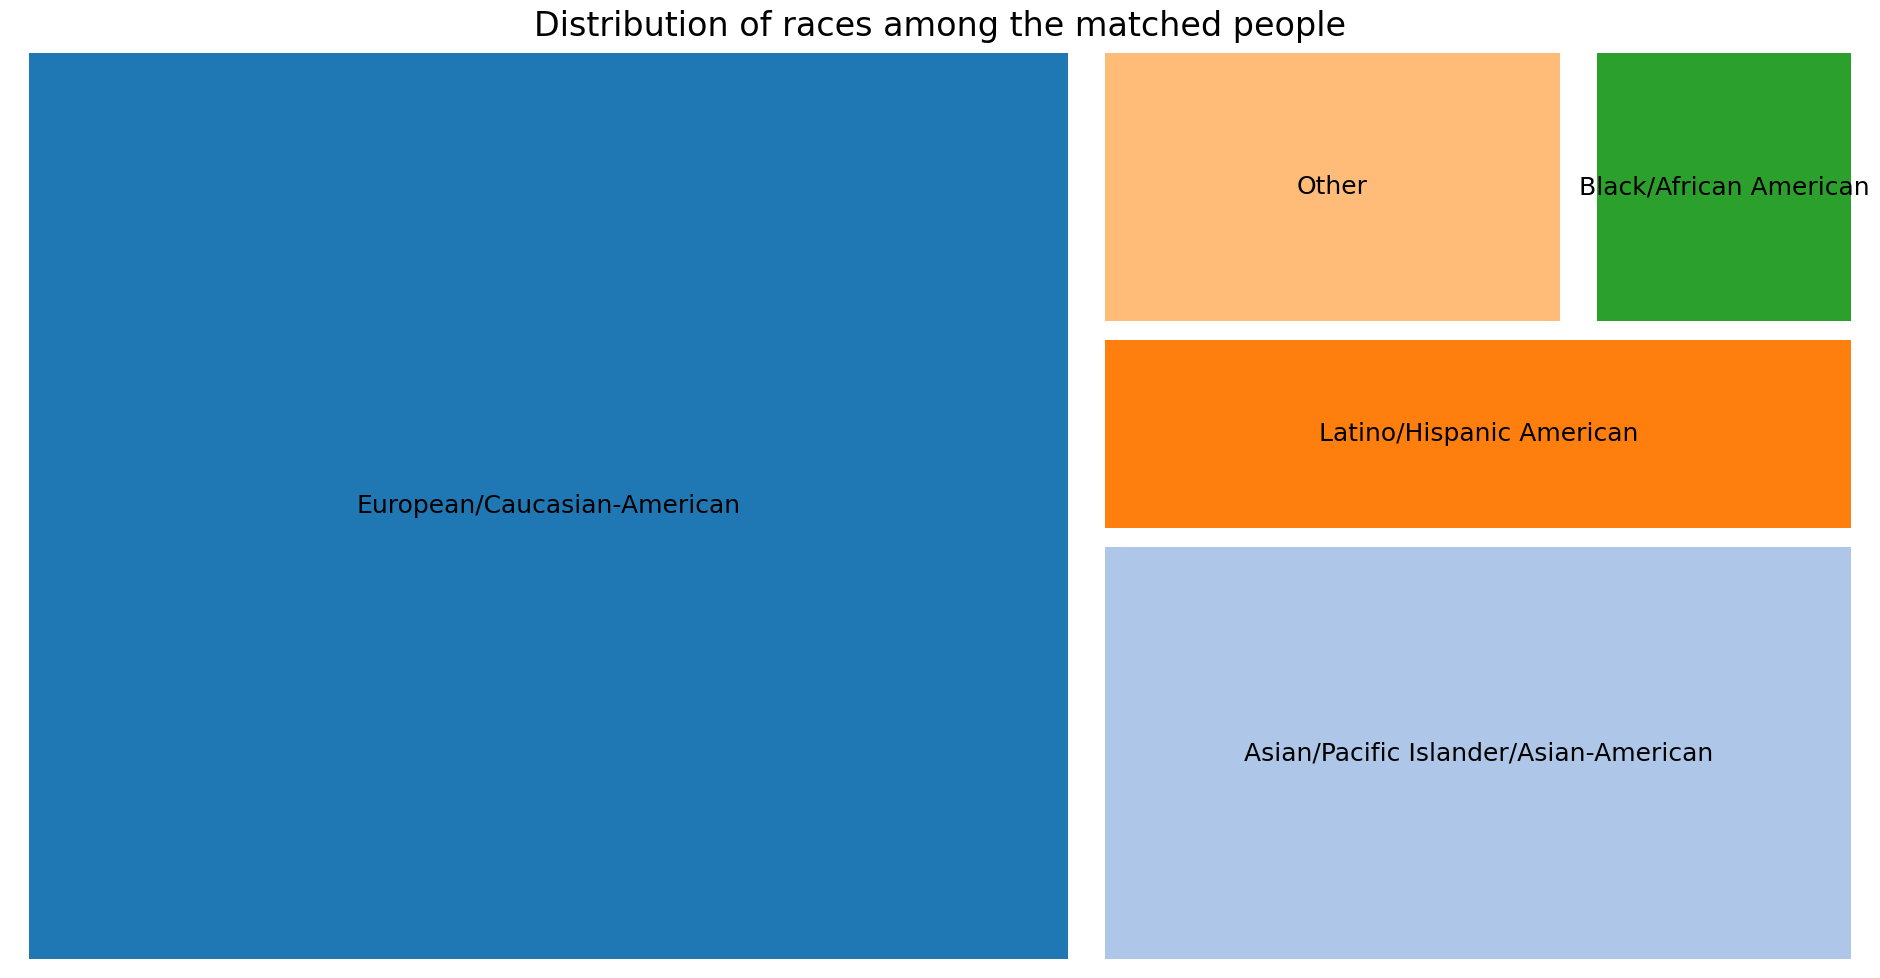

In [71]:
# create a plot figure with figsize
plt.figure(figsize=(24, 12))
# we don't require the axis values so lets remove it
plt.axis("off")
axis = squarify.plot(matches["race"].value_counts(),
                     label=matches["race"].value_counts().index,
                     color=sb.color_palette("tab20", len(
                                            matches["race"].value_counts())),
                     pad=1,
                     text_kwargs={'fontsize': 18})
axis.set_title("Distribution of races among the matched people", fontsize=24)


In [72]:
matches['Shared_interests'].value_counts()

many          534
balanced      370
everything     67
a little       54
none            3
Name: Shared_interests, dtype: int64

Text(0.5, 1.0, 'Distribution of shared interests between matched people ?')

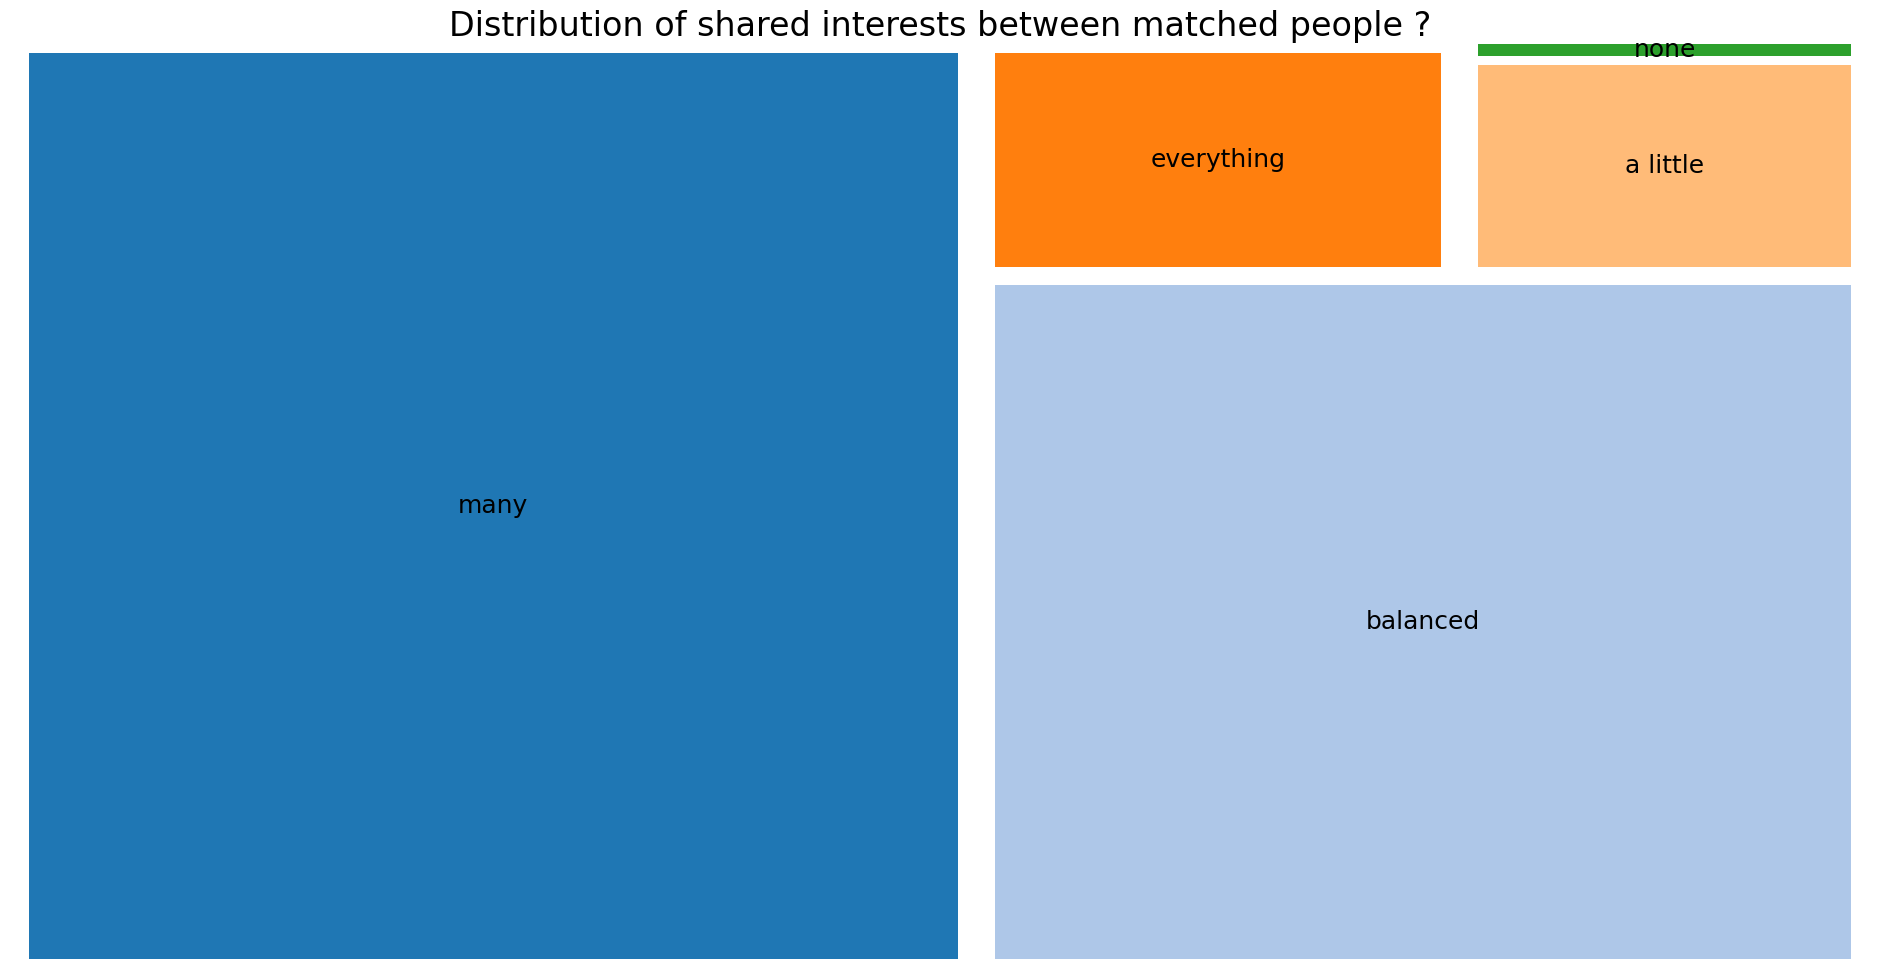

In [73]:
# create a plot figure with figsize
plt.figure(figsize=(24, 12))
# we don't require the axis values so lets remove it
plt.axis("off")
axis = squarify.plot(matches["Shared_interests"].value_counts(),
                     label=matches["Shared_interests"].value_counts().index,
                     color=sb.color_palette("tab20", len(
                                            matches["Shared_interests"].value_counts())),
                     pad=0.5,
                     text_kwargs={'fontsize': 18})
axis.set_title(
    "Distribution of shared interests between matched people ?", fontsize=24)


In [74]:
nomatches['Shared_interests'].value_counts()

balanced      2466
many          1266
a little      1064
everything      92
none            55
Name: Shared_interests, dtype: int64

Text(0.5, 1.0, 'Distribution of shared interests between not matched people ?')

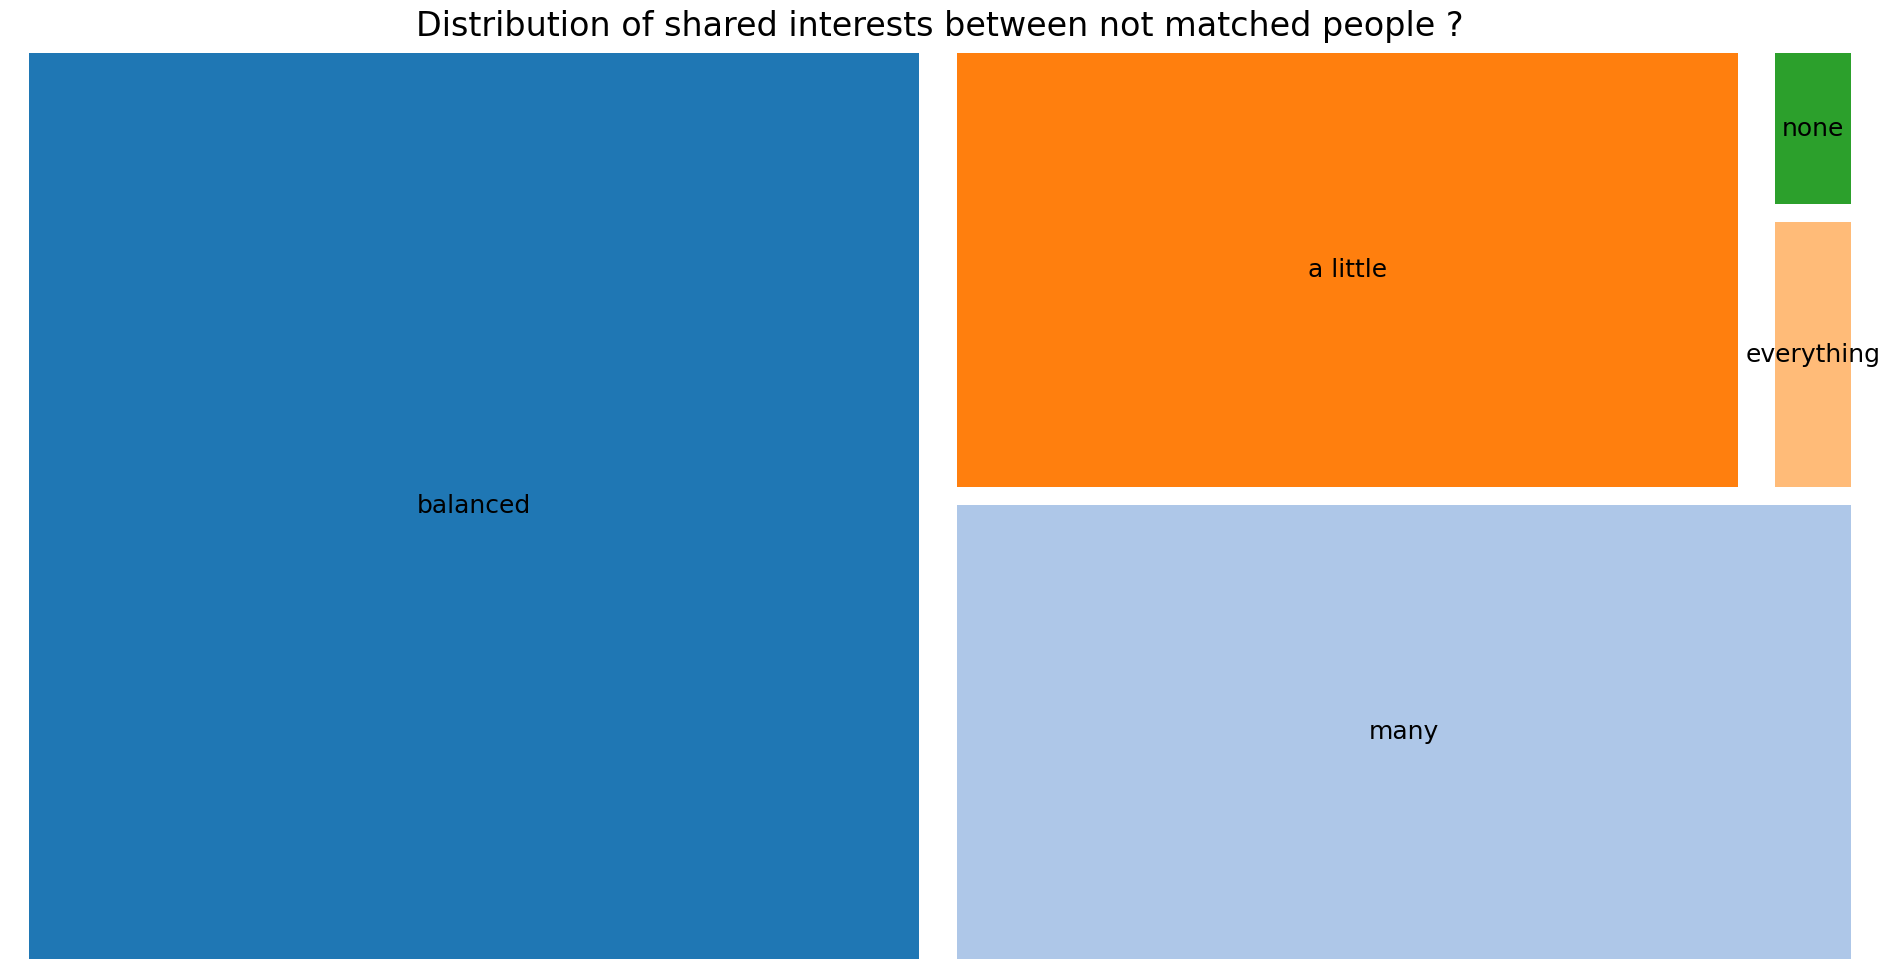

In [75]:
# create a plot figure with figsize
plt.figure(figsize=(24, 12))
# we don't require the axis values so lets remove it
plt.axis("off")
axis = squarify.plot(nomatches["Shared_interests"].value_counts(),
                     label=nomatches["Shared_interests"].value_counts().index,
                     color=sb.color_palette("tab20", len(
                                            nomatches["Shared_interests"].value_counts())),
                     pad=0.5,
                     text_kwargs={'fontsize': 18})
axis.set_title(
    "Distribution of shared interests between not matched people ?", fontsize=24)


In [76]:
matches['prob'].value_counts()

moderate chance         496
great chance            469
low chance               74
I'm 100 percent sure     71
no chance                 3
Name: prob, dtype: int64

Text(0.5, 1.0, "Among people with a match, what is the probability that people think their partner will say 'yes' for them ?")

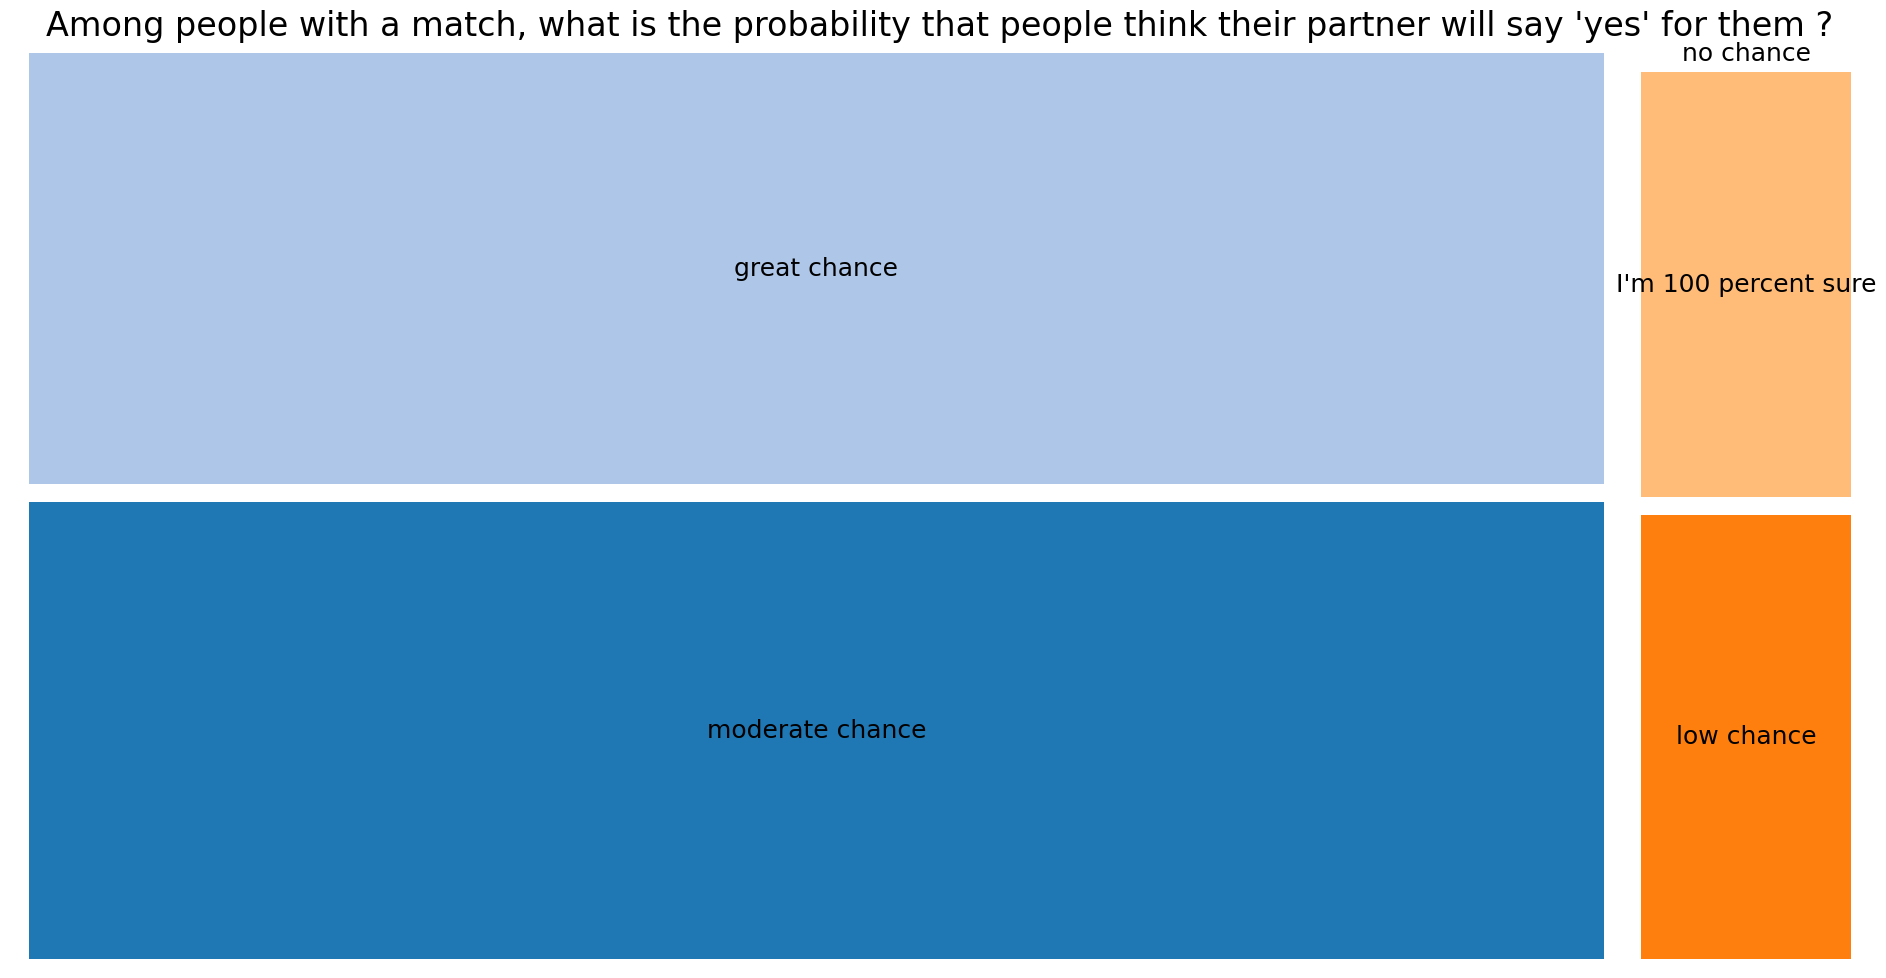

In [77]:
# create a plot figure with figsize
plt.figure(figsize=(24, 12))
# we don't require the axis values so lets remove it
plt.axis("off")
axis = squarify.plot(matches["prob"].value_counts(),
                     label=matches["prob"].value_counts().index,
                     color=sb.color_palette("tab20", len(
                                            matches["prob"].value_counts())),
                     pad=0.5,
                     text_kwargs={'fontsize': 18})
axis.set_title(
    "Among people with a match, what is the probability that people think their partner will say 'yes' for them ?", fontsize=24)


Text(0.5, 1.0, "Among people with not match, what is the probability that people think their partner will say 'yes' for them ?")

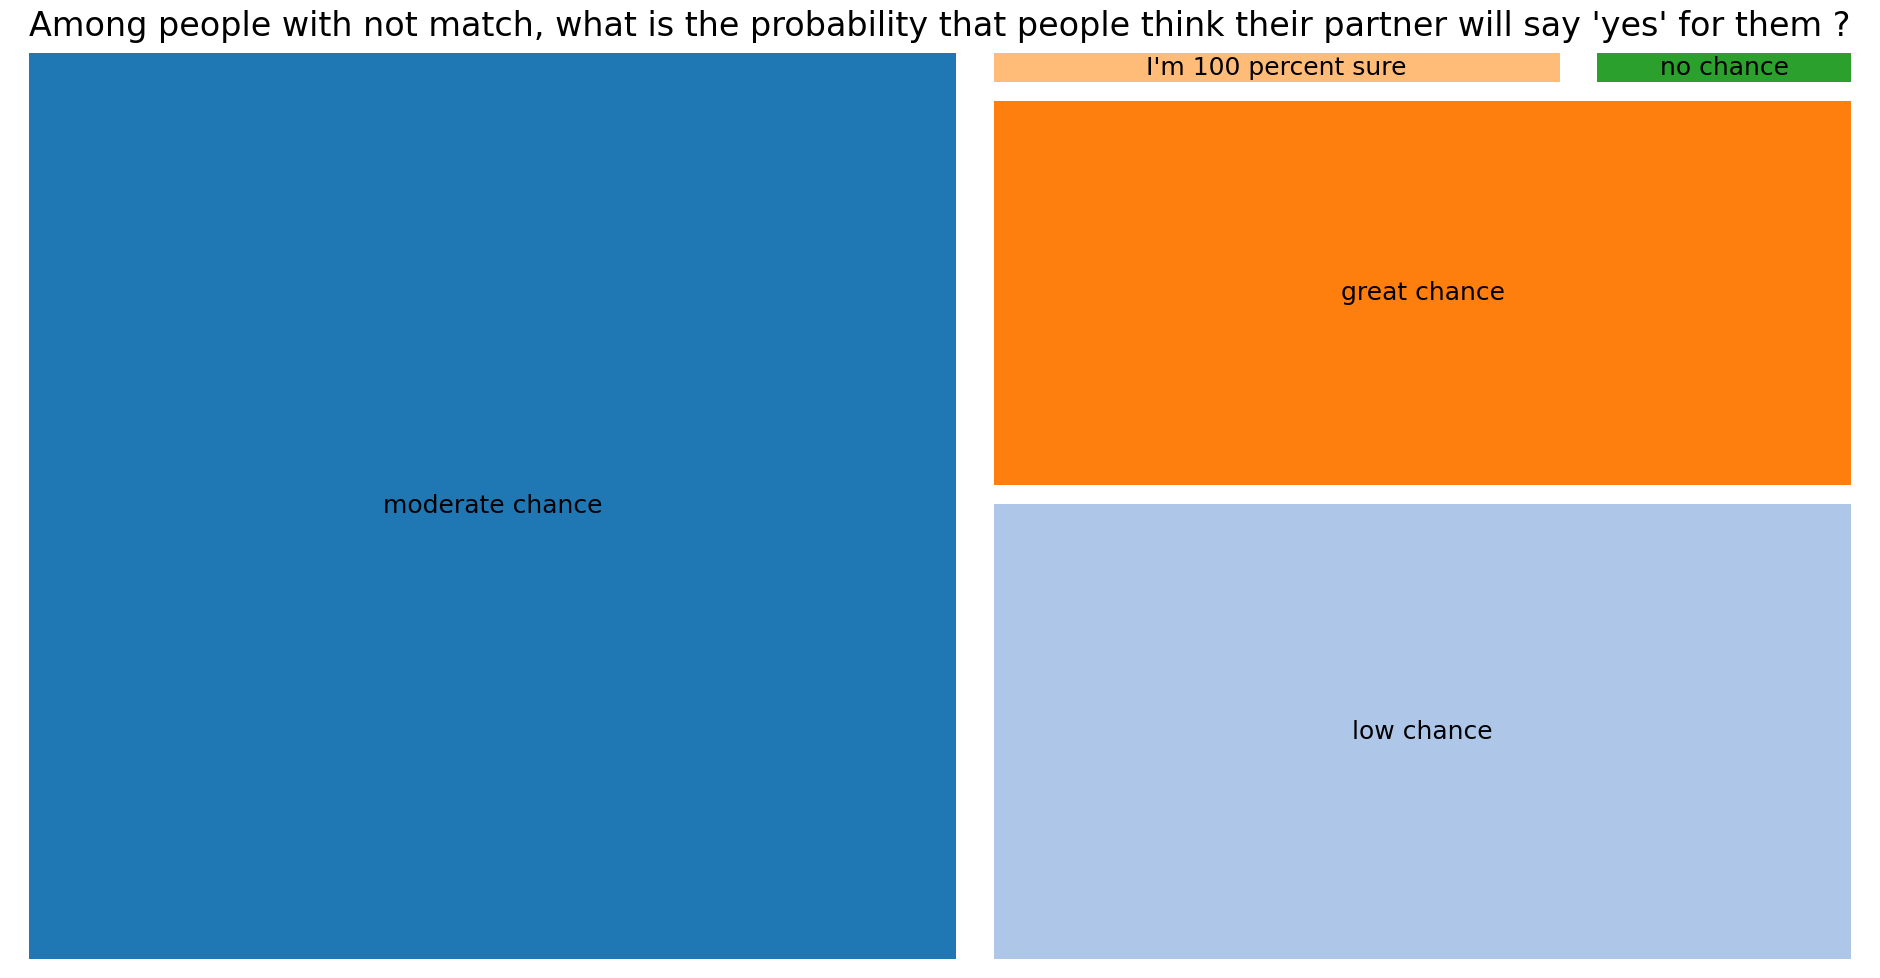

In [78]:
# create a plot figure with figsize
plt.figure(figsize=(24, 12))
# we don't require the axis values so lets remove it
plt.axis("off")
axis = squarify.plot(nomatches["prob"].value_counts(),
                     label=nomatches["prob"].value_counts().index,
                     color=sb.color_palette("tab20", len(
                                            nomatches["prob"].value_counts())),
                     pad=0.5,
                     text_kwargs={'fontsize': 18})
axis.set_title(
    "Among people with not match, what is the probability that people think their partner will say 'yes' for them ?", fontsize=24)
